### 新冠疫情数据绘图案例

### 下载数据

In [33]:
import time
import json
import requests

url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)  #从腾讯网站上直接下载使用
print(url)

#使用json提供的函数下载，并解析为json对象
data = json.loads(requests.get(url=url).json()['data'])

#http://json.cn 在线查看json格式文件


https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=1611495748744


In [ ]:
#json文件格式， 类似嵌套的字典
{
    "status": "0",
    "message": "success",
    "data": {
        "title": {
            "id": "001",
            "name" : "test"
        },
        "content": [
            {
                "id": "001",
                "value":"hello 001"
            },
            {
                "id": "002",
                 "value":"hello 002"
            }
        ]
    }
}

In [34]:
print(data.keys())

dict_keys(['lastUpdateTime', 'chinaTotal', 'chinaAdd', 'isShowAdd', 'showAddSwitch', 'areaTree'])


### 绘制中国不同省份确诊病柱状图

In [36]:
# 通过分析json的结构，获取省份信息列表
province_list = data['areaTree'][0]['children'] # 省份信息列表

print(province_list[0])   # 打印其中一个省份查看数据


{'name': '香港', 'today': {'confirm': 81, 'confirmCuts': 0, 'isUpdated': True, 'tip': '', 'wzz_add': 0}, 'total': {'nowConfirm': 883, 'confirm': 10085, 'suspect': 0, 'dead': 169, 'deadRate': '1.68', 'showRate': False, 'heal': 9033, 'healRate': '89.57', 'showHeal': True, 'wzz': 0}, 'children': [{'name': '地区待确认', 'today': {'confirm': 81, 'confirmCuts': 0, 'isUpdated': True}, 'total': {'nowConfirm': 883, 'confirm': 10085, 'suspect': 0, 'dead': 169, 'deadRate': '1.68', 'showRate': False, 'heal': 9033, 'healRate': '89.57', 'showHeal': True, 'wzz': 0}}]}


In [39]:
# 解析每个省份确诊的总人数
total_data = {}  #字典数据结构，key为省份名，， value为截止目前确诊病例数
for province in province_list:
    if province['name'] not in total_data:
        total_data.update({province['name']:0})  #字典中没有，首次初始化
    for city_data in province['children']:
        total_data[province['name']] += int(city_data['total']['nowConfirm'])    #一个省的确诊为下属城市的总和
print(total_data)


{'香港': 883, '河北': 841, '黑龙江': 382, '吉林': 206, '上海': 102, '台湾': 95, '北京': 51, '广东': 43, '陕西': 24, '天津': 24, '福建': 17, '辽宁': 16, '内蒙古': 14, '山西': 13, '四川': 11, '浙江': 10, '湖南': 6, '江苏': 6, '河南': 4, '广西': 3, '山东': 3, '甘肃': 1, '重庆': 1, '湖北': 1, '安徽': 1, '云南': 1, '澳门': 1, '西藏': 0, '贵州': 0, '青海': 0, '宁夏': 0, '江西': 0, '新疆': 0, '海南': 0}


dict_keys(['香港', '河北', '黑龙江', '吉林', '上海', '台湾', '北京', '广东', '陕西', '天津', '福建', '辽宁', '内蒙古', '山西', '四川', '浙江', '湖南', '江苏', '河南', '广西', '山东', '甘肃', '重庆', '湖北', '安徽', '云南', '澳门', '西藏', '贵州', '青海', '宁夏', '江西', '新疆', '海南'])
dict_values([883, 841, 382, 206, 102, 95, 51, 43, 24, 24, 17, 16, 14, 13, 11, 10, 6, 6, 4, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])


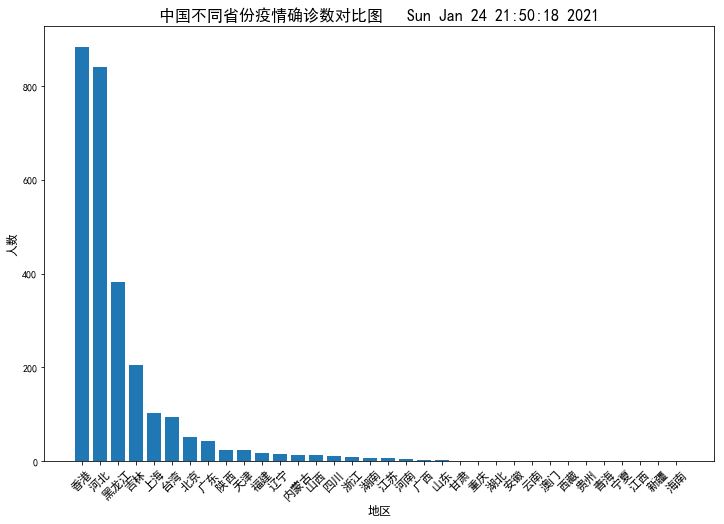

In [40]:
%matplotlib inline
#省的名字列表
province_names = total_data.keys()
print(province_names)
#省的确诊病例列表
province_confirm_count = total_data.values()
print(province_confirm_count)

import matplotlib.pyplot as plt 
import numpy as np
plt.rcParams['font.sans-serif'] = ['simhei']   # 用来正常显示中文标签

# 绘图
plt.figure(figsize=[12,8])

plt.bar(province_names,province_confirm_count)

plt.xlabel("地区", size=12)
plt.ylabel("人数", fontproperties='SimHei', rotation=90, size=12)
localtime = time.asctime( time.localtime(time.time()) )
plt.title("中国不同省份疫情确诊数对比图   "+localtime, size=16)
plt.xticks(list(province_names), rotation=45, size=12)
    
plt.show()


本案例基于下面文章修改

版权声明：本文为qq_33499889原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接和本声明。
本文链接：https://blog.csdn.net/qq_33499889/article/details/104800789 

In [42]:
import pandas as pd
name_list=[]
count_list=[]
for key in total_data.keys():
    name_list.append(key)
    count_list.append(total_data.get(key))

df = pd.DataFrame({"name":name_list,"count":count_list})
df2=df.sort_values(by='count')


,count
count,34.000000
mean,81.176471
std,211.599747
min,0.000000
25%,1.000000
50%,6.000000
75%,24.000000
max,883.000000


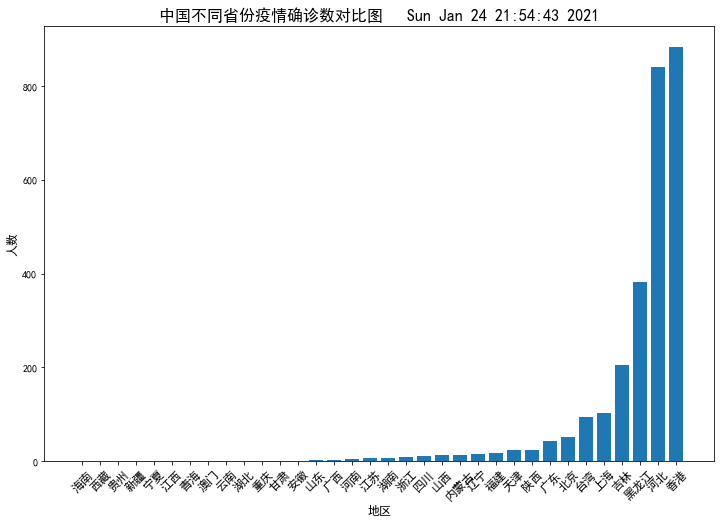

In [43]:
plt.rcParams['font.sans-serif'] = ['simhei']   # 用来正常显示中文标签

# 绘图
plt.figure(figsize=[12,8])

plt.bar(df2['name'],df2['count'])

plt.xlabel("地区", size=12)
plt.ylabel("人数", fontproperties='SimHei', rotation=90, size=12)
localtime = time.asctime( time.localtime(time.time()) )
plt.title("中国不同省份疫情确诊数对比图   "+localtime, size=16)
plt.xticks(list(province_names), rotation=45, size=12)
    
plt.show()